In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


In [2]:
df=pd.read_csv("../data/df_clasi.csv")

## **MODELOS**

In [22]:
X=df[['Age', 'Height', 'Weight', 'family_with_overweight', 'Alcohol','Andar_bici','Control_kcal', 'FastFood',"Male"]]
y= df["NObeyesdad"]
#Para poder hacer la clasificación debemos tomar como target el BMI ya que es el rango
# que usamos para categorizar. De esta forma podremos predecir de un modo mucho mas preciso

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**LOGISTIC REGRESION**

In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\UX490U\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [28]:
predictions = model.predict(X_test)
print(predictions) #primera aproximacios, an no he hecho el train

[0 6 0 0 3 0 5 2 4 0 1 6 5 5 6 4 6 5 4 1 4 2 6 5 0 1 1 6 6 0 6 1 2 3 0 6 5
 3 0 3 0 5 3 3 2 0 5 3 4 5 3 0 3 2 0 1 5 5 2 5 3 6 1 0 5 4 3 6 0 0 1 4 0 0
 2 5 5 2 6 5 3 4 5 5 4 4 3 2 3 1 1 5 0 2 1 0 2 4 2 5 4 4 6 5 1 4 0 6 6 5 4
 2 1 3 0 4 4 5 1 3 6 5 4 2 1 5 4 4 6 5 6 5 3 4 2 6 0 6 3 6 2 2 0 0 3 5 5 6
 0 5 0 0 0 5 4 2 1 2 0 0 2 0 4 0 5 0 5 2 2 1 2 4 5 6 4 1 4 1 4 2 0 5 0 2 5
 4 2 6 5 5 0 6 0 3 6 3 5 6 6 0 5 5 6 6 3 6 2 2 4 6 2 4 0 4 5 0 2 5 5 5 6 1
 5 1 5 4 0 6 2 2 2 6 3 2 3 4 4 4 1 0 1 1 2 4 5 4 3 4 6 3 2 5 0 1 2 1 4 5 4
 4 6 6 2 4 1 6 6 3 2 6 5 6 2 4 5 4 5 6 5 0 0 2 1 6 6 2 4 1 0 5 4 2 3 5 0 2
 5 5 1 4 3 2 0 0 3 1 1 2 1 6 2 5 0 6 2 1 4 6 1 2 0 3 6 0 3 6 4 4 6 0 0 3 5
 6 4 2 4 0 0 0 4 6 2 4 6 5 2 5 2 4 2 6 1 0 0 1 1 1 2 4 1 5 6 5 5 6 4 1 2 6
 0 5 0 5 4 2 0 0 4 4 1 4 3 0 6 2 6 6 3 1 5 2 6 1 5 2 0 6 1 6 2 0 2 2 4 0 0
 6 3 6 4 1 2 2 6 0 2 5 2 5 3 5 1]


In [29]:
acierto = accuracy_score(y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 81.32 %
Error: 18.68 %


In [30]:
model.score(X_train, y_train) #Aquracy

0.8193127962085308

In [31]:
c_matrix = confusion_matrix(y_test, predictions)


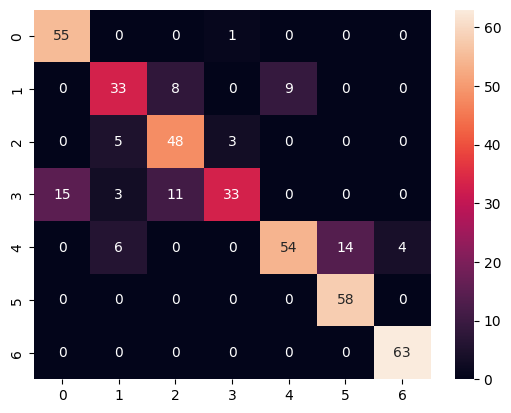

In [32]:
sns.heatmap(c_matrix, annot=True,fmt='.0f');

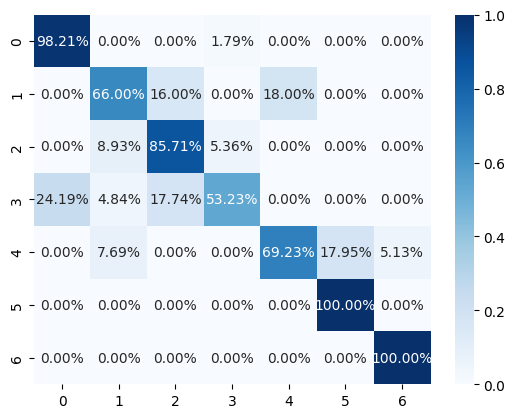

In [43]:
sns.heatmap(confusion_matrix(y_test, predictions, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

**LOGISTIC REGRESION SCAL**

In [33]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)


In [34]:
modelsc = LogisticRegression(max_iter=1000)
modelsc.fit(X_train_scal, y_train)

LogisticRegression(max_iter=1000)

In [47]:
predictionsc = modelsc.predict(X_test_scal)

In [48]:
modelsc.score(X_train_scal, y_train)

0.9040284360189573

In [39]:
name='Logistic Regression'
cv_results = model_selection.cross_val_score(modelsc, scaler.fit_transform(X_train),y_train, scoring='accuracy',cv=10)
print(cv_results)
print(cv_results.mean())#La media de los resultados que cabe esperar 
print(cv_results.std())#los estandarizados si la td desviation es alta significa que puede haber mucha variación entre lo que hay en el test y en el train

[0.85798817 0.92899408 0.8816568  0.88757396 0.86982249 0.88757396
 0.86982249 0.9112426  0.9047619  0.88690476]
0.8886341222879685
0.020250991977383087


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictionsc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        56
           1       0.78      0.80      0.79        50
           2       0.81      0.89      0.85        56
           3       0.98      0.71      0.82        62
           4       0.96      0.90      0.93        78
           5       0.92      1.00      0.96        58
           6       1.00      1.00      1.00        63

    accuracy                           0.90       423
   macro avg       0.90      0.90      0.90       423
weighted avg       0.91      0.90      0.90       423



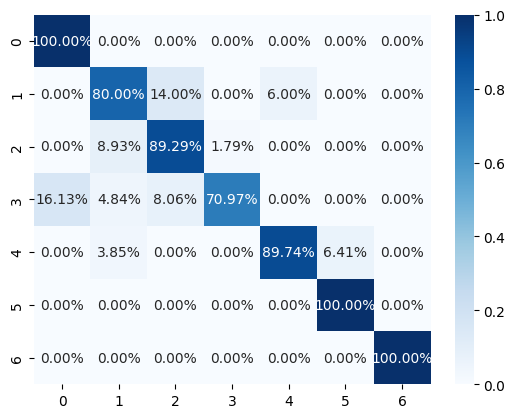

In [50]:
sns.heatmap(confusion_matrix(y_test, predictionsc, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

In [ ]:
# Guardar el transformador PolynomialFeatures
# with open("../modelos/pol2_transform_ob_cop.pkl", "wb") as pol_transf_ob_cop:
#     pickle.dump(pol_2, pol_transf_ob_cop)

In [ ]:
# with open("../modelos/pol2_ob_cop.pkl", "wb") as model_pol2_ob_cop:
#     pickle.dump(model_4, model_pol2_ob_cop)

**RANDOM FOREST**

Accuracy: 0.9102
Confusion Matrix:
 [[51  0  0  5  0  0  0]
 [ 0 47  2  0  0  1  0]
 [ 0  1 52  3  0  0  0]
 [ 8  3  6 45  0  0  0]
 [ 0  3  1  0 70  4  0]
 [ 0  0  0  0  1 57  0]
 [ 0  0  0  0  0  0 63]]


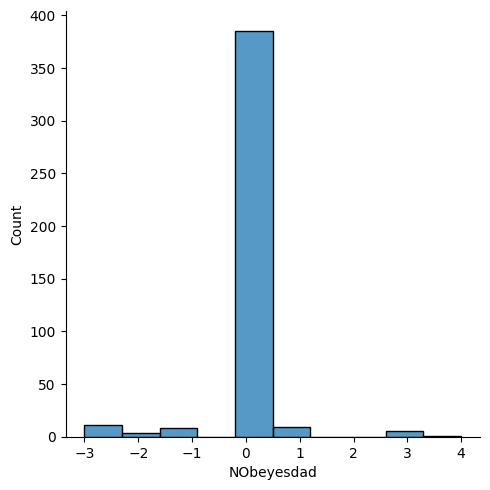

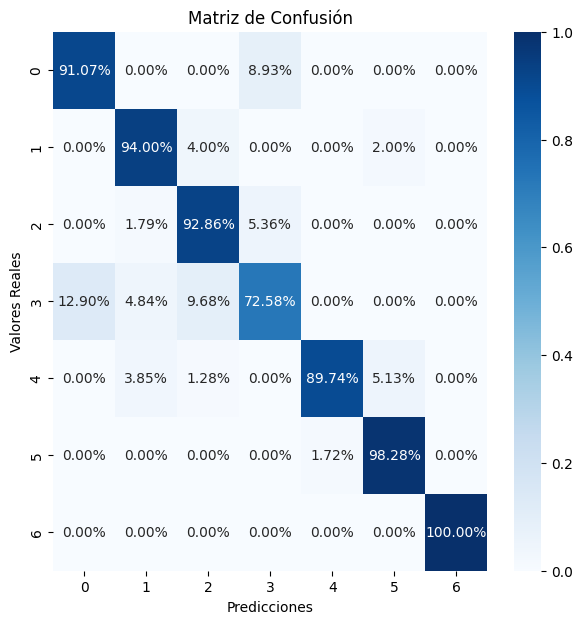

In [55]:
from sklearn.ensemble import RandomForestClassifier

rnd_reg = RandomForestClassifier(n_estimators=200,
                                 max_leaf_nodes=32,
                                 random_state=42)
rnd_reg.fit(X_train, y_train)

y_pred_reg = rnd_reg.predict(X_test)
sns.displot(y_pred_reg - y_test)
accuracy = accuracy_score(y_test, y_pred_reg)
print(f'Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred_reg)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_reg, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues')
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()

In [89]:
with open("../modelos/rnd_ob_cop.pkl", "wb") as model_rnd_ob_cop:
    pickle.dump(rnd_reg, model_rnd_ob_cop)

Tenemos que tener en cuenta que el rengo entre una categoria y otra es de un 5%, por tanto el que parece mejor modelo es el polinomico, que nos da un Mae de 0.047%

### **MODELO REDES NEURONALES**

In [56]:
from tensorflow.keras.optimizers import RMSprop
from keras.utils import get_file
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [69]:


# Definir el modelo para clasificación multiclase con 6 categorías
model_rn = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=X_train_scal.shape[1:]),  
    keras.layers.Dense(16, activation='relu'),  # Capa oculta adicional
    keras.layers.Dense(7, activation='softmax')  # 6 neuronas para 6 categorías
])

# Compilar el modelo
model_rn.compile(loss="sparse_categorical_crossentropy",  
                 optimizer=tf.keras.optimizers.RMSprop(0.001),
                 metrics=['accuracy'])

# Entrenar el modelo
history = model_rn.fit(X_train_scal, y_train, epochs=20, validation_data=(X_test_scal, y_test))


Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3689 - loss: 1.7649 - val_accuracy: 0.5154 - val_loss: 1.4115
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5403 - loss: 1.3484 - val_accuracy: 0.6359 - val_loss: 1.1082
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6721 - loss: 1.0537 - val_accuracy: 0.6927 - val_loss: 0.9049
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7304 - loss: 0.8791 - val_accuracy: 0.7305 - val_loss: 0.7679
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7697 - loss: 0.7277 - val_accuracy: 0.7683 - val_loss: 0.6599
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7915 - loss: 0.6394 - val_accuracy: 0.8038 - val_loss: 0.5799
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8031 - loss: 0.5726 - val_accuracy: 0.8251 - val_loss: 0.5221
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8306 - loss: 0.5047 - val_accuracy: 0.8322 - val_loss

In [70]:
model_rn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,600 (14.07 KB)

 Trainable params: 1,799 (7.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,801 (7.04 KB)

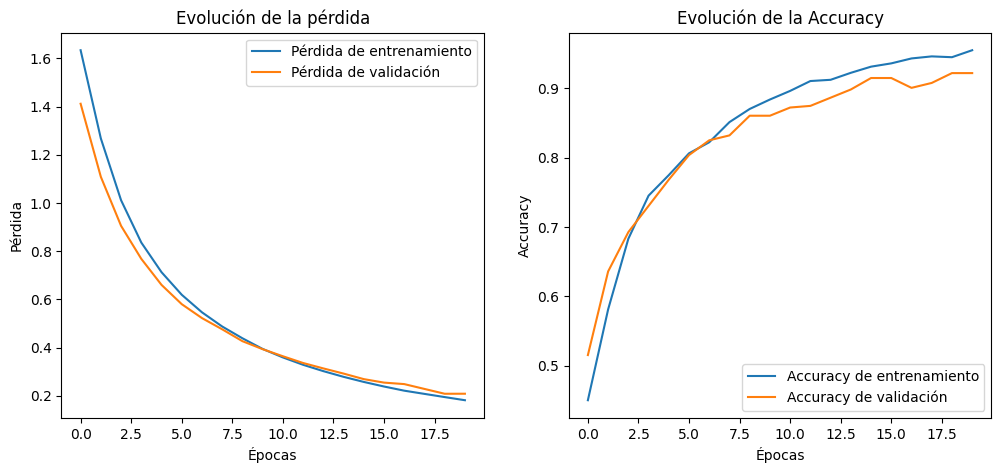

In [72]:
plt.figure(figsize=(12, 5))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la pérdida')

# Gráfico de accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy de validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Evolución de la Accuracy')

plt.show()


In [ ]:
y_pred_rn = model_rn.predict(X_test_scal)  # Genera predicciones en forma de probabilidades
y_pred_rn = np.argmax(y_pred_rn, axis=1)  # Conviertir probabilidades en etiquetas de clase


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [90]:
model_rn.save("../modelos/model_keras_ob_cop.h5")

---------------------------

Evaluamos los modelos

In [80]:
df_resultados_rn = pd.DataFrame({"Type": y_pred_rn,"Type real":y_test})

In [82]:
df_resultados_rn[:15]

,Type,Type real
544,0,0
1987,6,6
420,0,0
527,0,0
196,3,3
744,0,0
1635,5,5
324,2,2
1449,4,4
634,0,0


In [83]:
df_resultados_rnd = pd.DataFrame({"Type": y_pred_reg,"Type real":y_test})

In [85]:
df_resultados_rnd[:15]

,Type,Type real
544,0,0
1987,6,6
420,0,0
527,0,0
196,3,3
744,0,0
1635,5,5
324,2,2
1449,4,4
634,0,0


**Evaluamos que modelo de los escogidos nos da mejores resultados en test**

In [87]:
accuracy = accuracy_score(df_resultados_rn["Type real"], df_resultados_rn["Type"])
conf_mat=confusion_matrix(df_resultados_rn["Type real"], df_resultados_rn["Type"])
clas_rep = classification_report(df_resultados_rn["Type real"],df_resultados_rn["Type"])

# Mostrar resultados
print(f"AC_rn: {accuracy} ")
print(f"CM_rn: {conf_mat} ")
print(f"Clas_rep_rn: {clas_rep}")

AC_rn: 0.9219858156028369 
CM_rn: [[56  0  0  0  0  0  0]
 [ 0 45  4  0  1  0  0]
 [ 0  2 47  7  0  0  0]
 [12  2  3 45  0  0  0]
 [ 0  0  0  0 77  1  0]
 [ 0  0  0  0  1 57  0]
 [ 0  0  0  0  0  0 63]] 
Clas_rep_rn:               precision    recall  f1-score   support

           0       0.82      1.00      0.90        56
           1       0.92      0.90      0.91        50
           2       0.87      0.84      0.85        56
           3       0.87      0.73      0.79        62
           4       0.97      0.99      0.98        78
           5       0.98      0.98      0.98        58
           6       1.00      1.00      1.00        63

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.92      0.92      0.92       423



In [88]:
accuracy = accuracy_score(df_resultados_rnd["Type real"], df_resultados_rnd["Type"])
clas_rep = classification_report(df_resultados_rnd["Type real"], df_resultados_rnd["Type"])
conf_mat=confusion_matrix(df_resultados_rnd["Type real"],df_resultados_rnd["Type"])

# Mostrar resultados
print(f"AC_rnd: {accuracy}")
print(f"CM_rnd: {conf_mat}")
print(f"Clas_rep_rnd: {clas_rep}")

AC_rnd: 0.9101654846335697
CM_rnd: [[51  0  0  5  0  0  0]
 [ 0 47  2  0  0  1  0]
 [ 0  1 52  3  0  0  0]
 [ 8  3  6 45  0  0  0]
 [ 0  3  1  0 70  4  0]
 [ 0  0  0  0  1 57  0]
 [ 0  0  0  0  0  0 63]]
Clas_rep_rnd:               precision    recall  f1-score   support

           0       0.86      0.91      0.89        56
           1       0.87      0.94      0.90        50
           2       0.85      0.93      0.89        56
           3       0.85      0.73      0.78        62
           4       0.99      0.90      0.94        78
           5       0.92      0.98      0.95        58
           6       1.00      1.00      1.00        63

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.91      0.91      0.91       423



    De todos los modelos estudiados vemos que el que mejor resultados nos da es el RadomForest

--------------------------------

----------------------------------